<a href="https://colab.research.google.com/github/PauCaBu/fluffy_CNN/blob/main/Training_1_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class Perceptron(object):

  def __init__(self, input_size, ls=0.25):
    self.W = np.zeros(input_size+1) # Plus 1 because of bias
    self.lr = ls
    self.history = []

  def activation(self, z):
    if z >= 0 :
      return 1
    else:
      return 0

  def predict(self,x):
    z = self.W.T.dot(x)
    return self.activation(z)

  def fit(self, X, Y, epochs):

    for k in range(epochs):
      for i in range(len(Y)):
        x_i = np.insert(X[i], 0, 1)
        y_pred_i =  self.predict(x_i)
        error = Y[i] - y_pred_i
        self.W = self.W + self.lr*error*x_i # update weights
      print(self.W)
      self.history.append(self.W)



In [ ]:
X = np.array([[0.0,0.0],
             [0.0,1.3],
             [0.2,0.5],
             [0.0,1],
             [0.8,0],
             [0.65, 0.95],
             [1.1, 0.35],
             [0.5, 1.35],
             [1,1]], dtype = np.float32)

Y = np.array([0,0,0,0,0,1,1,1,1], dtype=np.float32)


In [ ]:
P = Perceptron(input_size=2)
P.fit(X,Y, epochs =15)


[0.         0.16249999 0.2375    ]
[-0.25        0.32499999  0.15000001]
[-0.25        0.28749998  0.3875    ]
[-0.25        0.44999997  0.30000001]
[-0.25        0.61249997  0.21250002]
[-0.25        0.77499996  0.12500003]
[-0.25        0.73749995  0.36250003]
[-0.5         0.69999994  0.27500004]
[-0.5         0.66249993  0.51250003]
[-0.5         0.82499993  0.42500004]
[-0.5         0.98749992  0.33750005]
[-0.75        0.78749992  0.33750005]
[-0.75        0.78749992  0.33750005]
[-0.75        0.78749992  0.33750005]
[-0.75        0.78749992  0.33750005]


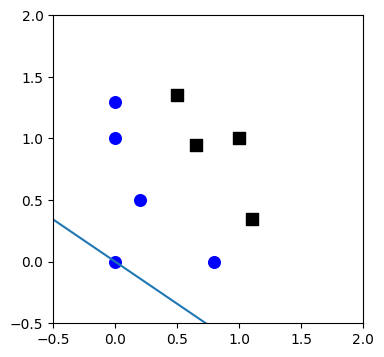

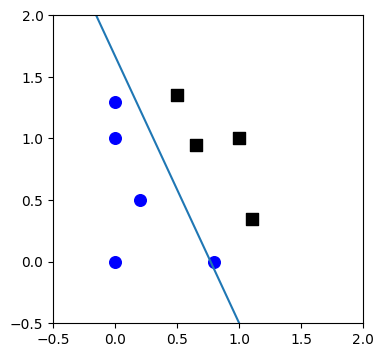

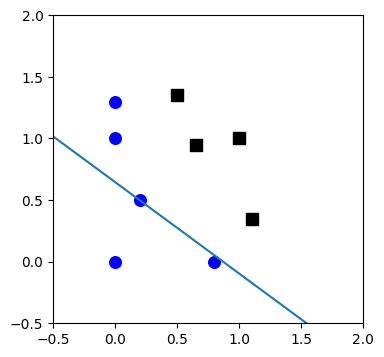

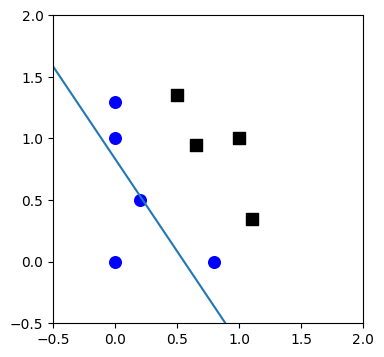

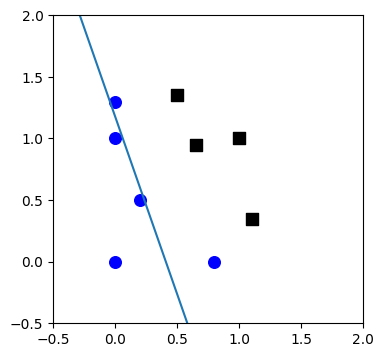

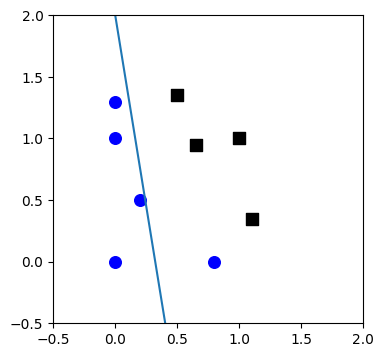

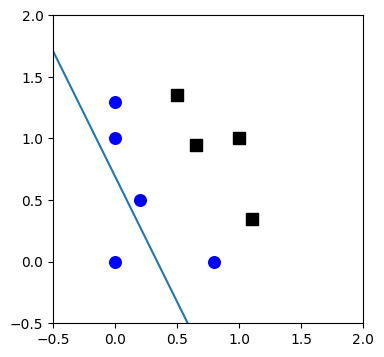

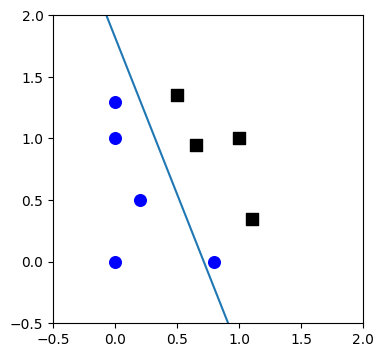

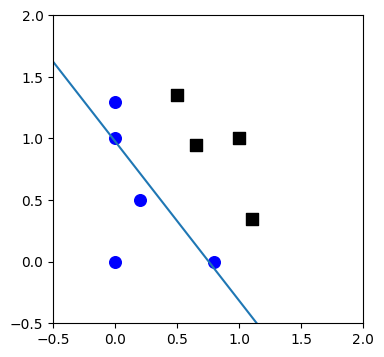

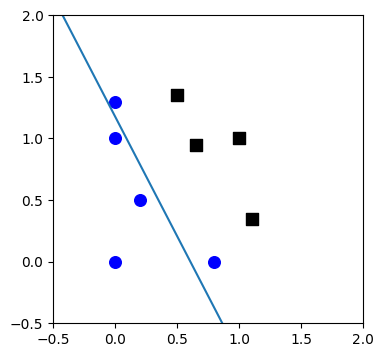

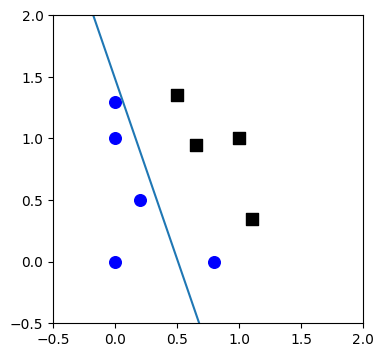

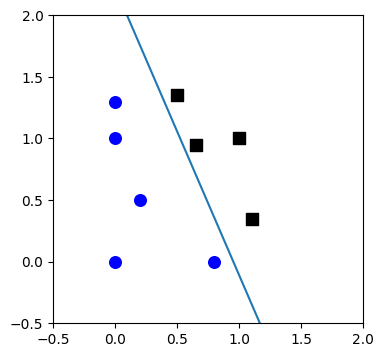

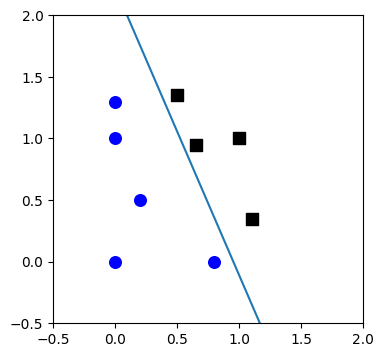

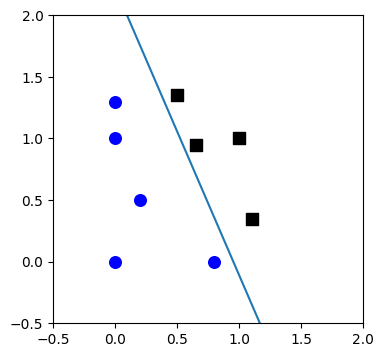

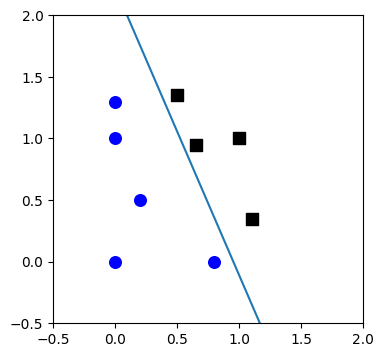

In [ ]:
for ep in range(15):
  fig = plt.figure(figsize=(4,4))
  plt.xlim((-0.5, 2))
  plt.ylim((-0.5, 2))


  for i in range(X.shape[0]):
    if Y[i] == 0:
      plt.scatter(X[i,0], X[i,1], color='blue', s=70, marker='o')
    else:
      plt.scatter(X[i,0], X[i,1], color='black', s=70, marker='s')

  ax = np.arange(100)/99*3 - 1
  ay = (-ax * P.history[ep][1] - P.history[ep][0])/P.history[ep][2]

  plt.plot(ax,ay)